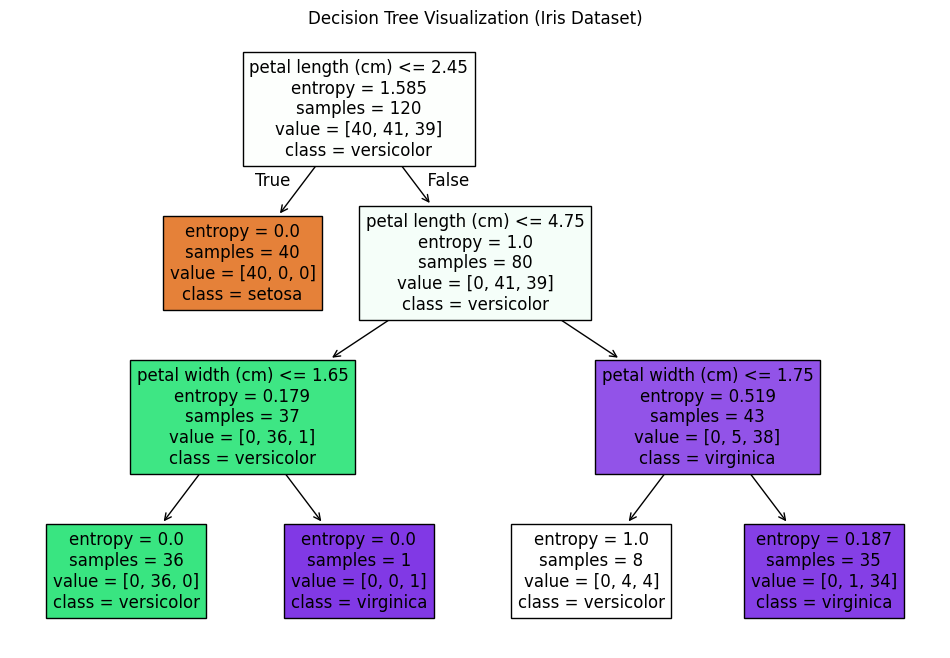


Decision Tree Rules:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



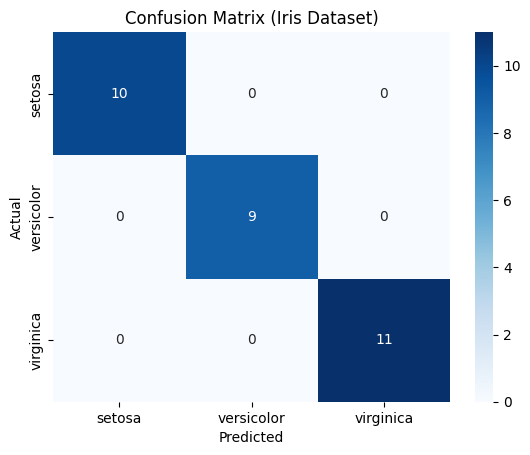

In [2]:
# Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization (Iris Dataset)")
plt.show()

# Textual representation of the tree
tree_rules = export_text(model, feature_names=iris.feature_names)
print("\nDecision Tree Rules:\n", tree_rules)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix (Iris Dataset)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


[[-5.73035386 -7.58328602]
 [ 1.94299219  1.91887482]
 [ 6.82968177  1.1648714 ]
 [-2.90130578  7.55077118]
 [ 5.84109276  1.56509431]
 [ 5.47021465  1.11708586]
 [-4.31954265 -6.97616949]
 [ 4.91033566  1.92293157]
 [ 3.57225841  1.8307902 ]
 [-7.50444577 -6.85401854]
 [ 3.99330595  0.89162168]
 [-1.35060204  8.19360381]
 [-0.37616425  7.06219833]
 [-1.93830711 10.14985177]
 [ 4.92965369  4.04857048]
 [ 5.69830332  0.2144302 ]
 [-2.58120774 10.01781903]
 [-8.00234921 -6.49769985]
 [-6.7973432  -5.81462922]
 [-3.6155326   7.8180795 ]
 [ 3.24131126  2.53613892]
 [-2.30033403  7.054616  ]
 [ 5.2164358   2.28441984]
 [-5.31410316 -6.94585985]
 [-7.32606081 -6.6860196 ]
 [ 5.03433098  1.5521852 ]
 [ 4.38490162  3.47716267]
 [-6.09382703 -6.45465203]
 [-6.61257693 -5.9904788 ]
 [-1.55519586  9.66567738]
 [ 4.60712557  1.42974491]
 [-1.6966718  10.37052616]
 [-3.49973395  8.4479884 ]
 [-3.83738367  9.21114736]
 [ 5.01102471  1.3691845 ]
 [ 4.40093079  1.06560602]
 [ 3.81765844  2.2168569 ]
 

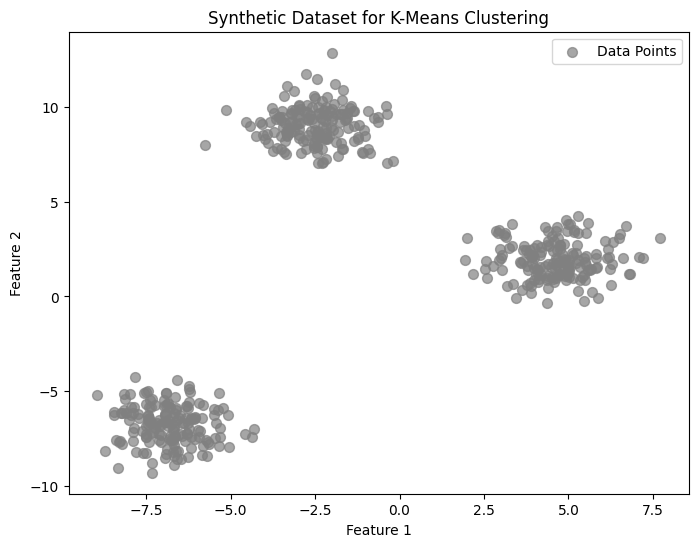

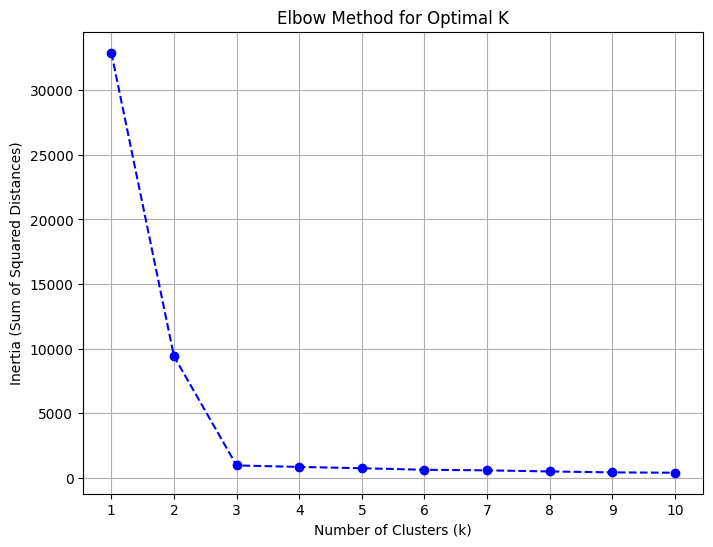

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
np.random.seed(42)
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)
print(X)
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', alpha=0.7, label='Data Points')
plt.title("Synthetic Dataset for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Elbow method to determine the optimal number of clusters
inertia = []  # Sum of squared distances for each k
k_values = range(1, 11)  # Number of clusters to test

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_values)
plt.grid()
plt.show()

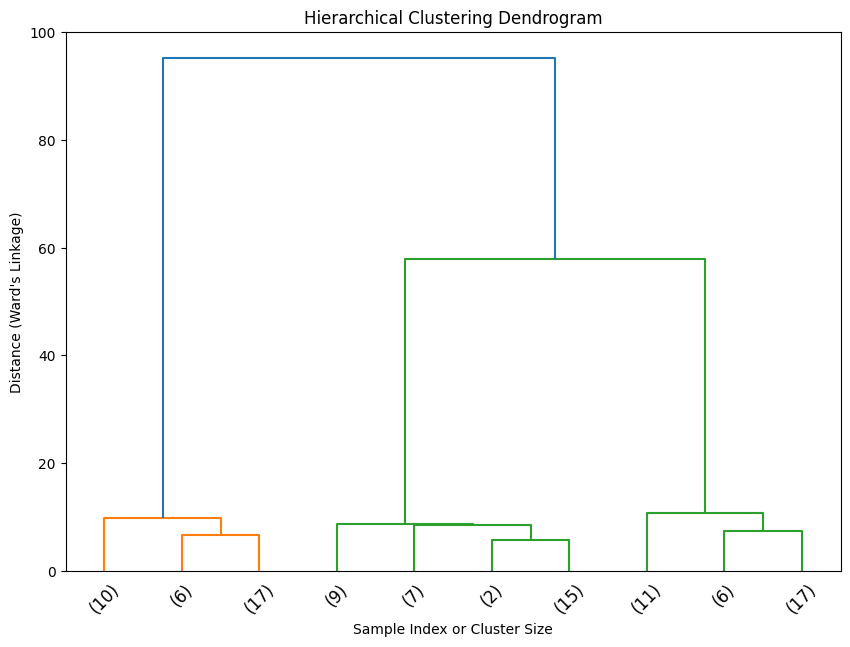

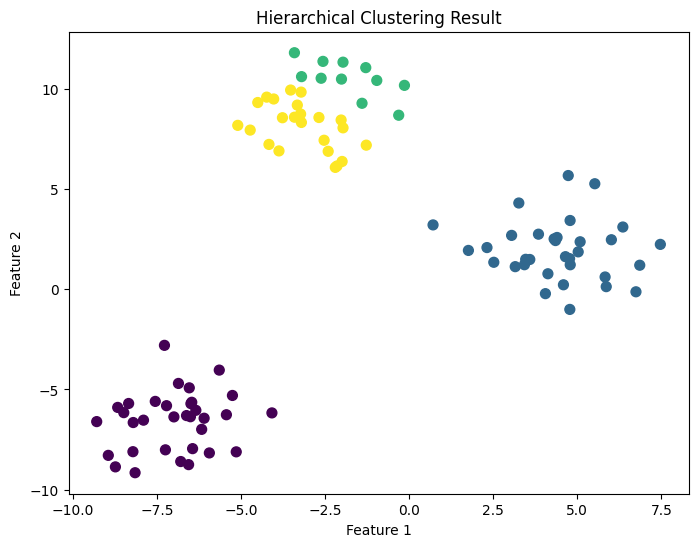

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.datasets import make_blobs

# Generate synthetic dataset
np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.5, random_state=42)

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=10, leaf_rotation=45, leaf_font_size=12)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance (Ward's Linkage)")
plt.show()

# Cut the dendrogram at a specific threshold distance to form clusters
threshold = 10
clusters = fcluster(linkage_matrix, t=threshold, criterion="distance")

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Hierarchical Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


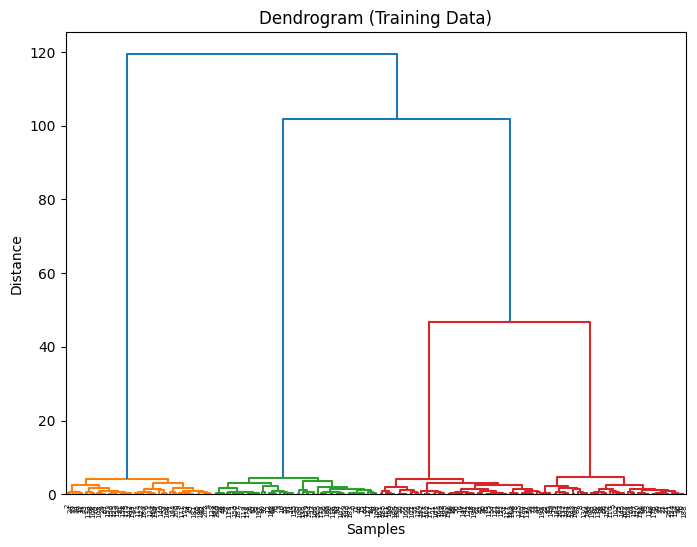

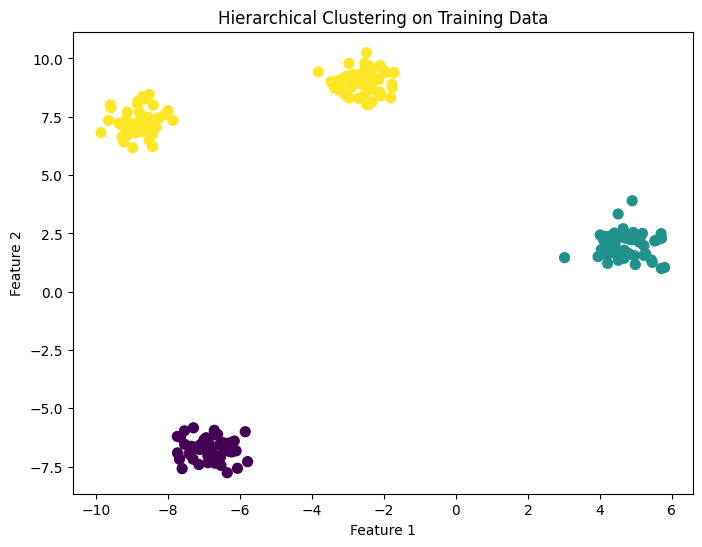

Silhouette Score for Training Data: 0.81


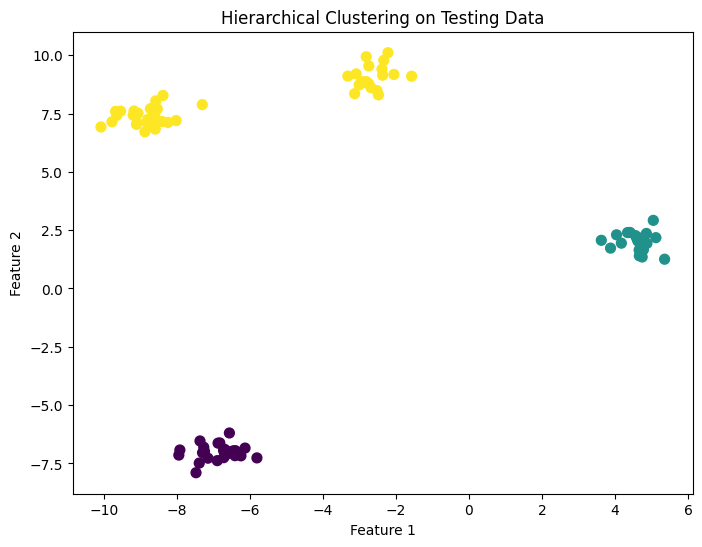

Silhouette Score for Testing Data: 0.81


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform hierarchical clustering on the training data
linkage_matrix = linkage(X_train, method="ward")
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram (Training Data)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Determine optimal number of clusters using dendrogram
optimal_threshold = linkage_matrix[-(4 - 1), 2]  # Assuming we know there are 4 clusters
train_labels = fcluster(linkage_matrix, t=optimal_threshold, criterion="distance")

# Plot clustering results for training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_labels, cmap="viridis", s=50)
plt.title("Hierarchical Clustering on Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate training clusters with silhouette score
train_score = silhouette_score(X_train, train_labels)
print(f"Silhouette Score for Training Data: {train_score:.2f}")

# Predict clusters for testing data
linkage_matrix_test = linkage(X_test, method="ward")
test_labels = fcluster(linkage_matrix_test, t=optimal_threshold, criterion="distance")

# Plot clustering results for testing data
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_labels, cmap="viridis", s=50)
plt.title("Hierarchical Clustering on Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate testing clusters with silhouette score
test_score = silhouette_score(X_test, test_labels)
print(f"Silhouette Score for Testing Data: {test_score:.2f}")


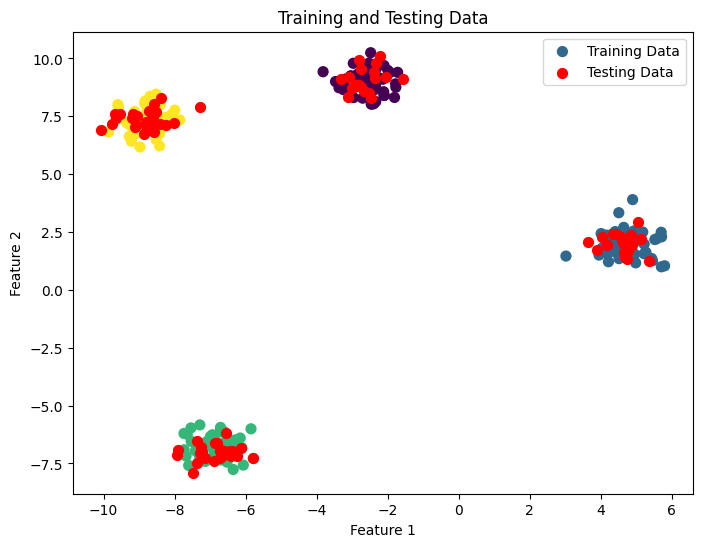

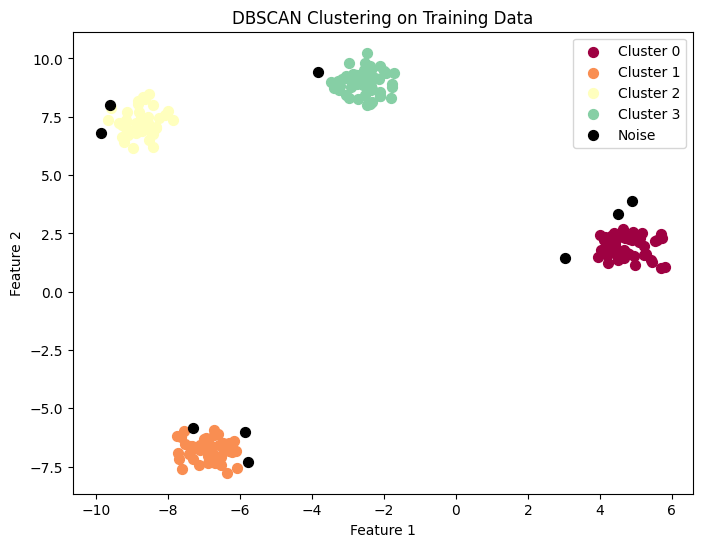

Silhouette Score for Training Data: 0.90


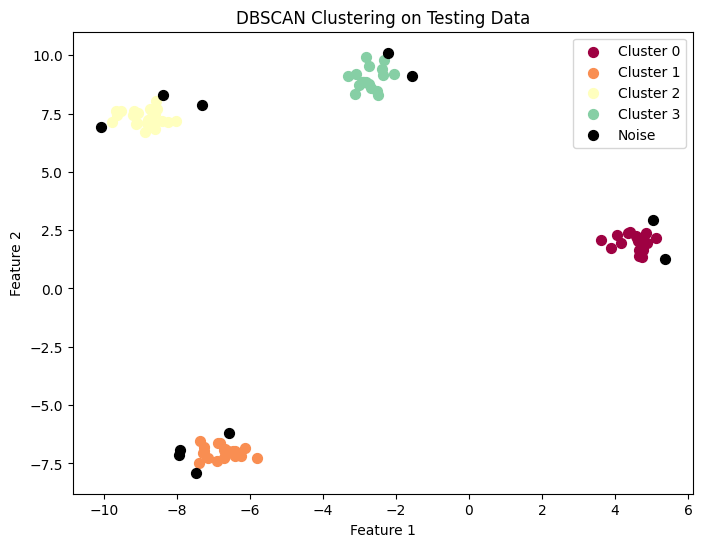

Silhouette Score for Testing Data: 0.92


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, label="Training Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', s=50, label="Testing Data")
plt.title("Training and Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Apply DBSCAN on the training data
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps: neighborhood size, min_samples: minimum points in a cluster
train_labels = dbscan.fit_predict(X_train)

# Plot DBSCAN clustering results for training data
plt.figure(figsize=(8, 6))
unique_labels = set(train_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (train_labels == k)
    xy = X_train[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, color=tuple(col), label=f"Cluster {k}" if k != -1 else "Noise")

plt.title("DBSCAN Clustering on Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Evaluate clustering performance using silhouette score on training data
core_samples_mask = (train_labels != -1)
if len(set(train_labels[core_samples_mask])) > 1:  # At least two clusters are required for silhouette score
    score = silhouette_score(X_train[core_samples_mask], train_labels[core_samples_mask])
    print(f"Silhouette Score for Training Data: {score:.2f}")
else:
    print("Silhouette score cannot be calculated with less than 2 clusters.")

# Predict clusters for the testing data
test_labels = dbscan.fit_predict(X_test)

# Plot DBSCAN clustering results for testing data
plt.figure(figsize=(8, 6))
unique_labels_test = set(test_labels)
colors_test = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_test))]

for k, col in zip(unique_labels_test, colors_test):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (test_labels == k)
    xy = X_test[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, color=tuple(col), label=f"Cluster {k}" if k != -1 else "Noise")

plt.title("DBSCAN Clustering on Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Evaluate clustering performance using silhouette score on testing data
core_samples_mask_test = (test_labels != -1)
if len(set(test_labels[core_samples_mask_test])) > 1:
    test_score = silhouette_score(X_test[core_samples_mask_test], test_labels[core_samples_mask_test])
    print(f"Silhouette Score for Testing Data: {test_score:.2f}")
else:
    print("Silhouette score cannot be calculated with less than 2 clusters.")


Principal Components:
 [[0.6778734  0.73517866]]
Explained Variance Ratio:
 [0.96318131]


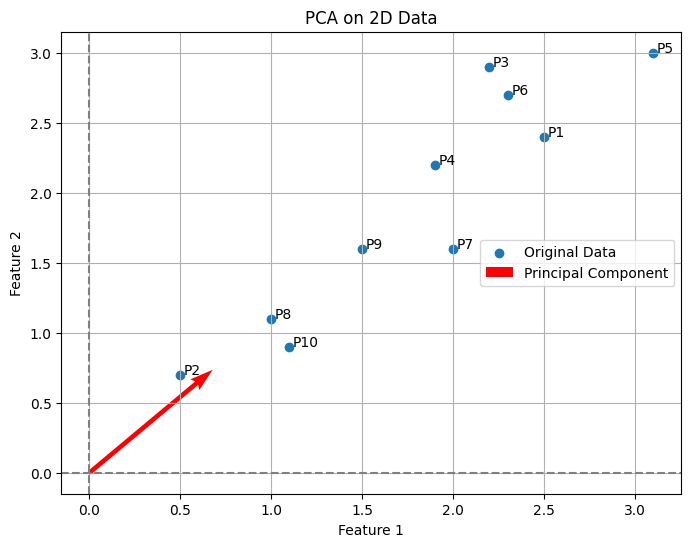

In [7]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the dataset
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2],
              [3.1, 3.0], [2.3, 2.7], [2.0, 1.6], [1.0, 1.1],
              [1.5, 1.6], [1.1, 0.9]])

# Step 1: Standardize the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Step 2: Apply PCA using sklearn
pca = PCA(n_components=1)  # Reduce to 1 principal component
X_pca = pca.fit_transform(X_centered)

# Print results
print("Principal Components:\n", pca.components_)
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)

# Plot original data and principal component
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Original Data")
for i, (x, y) in enumerate(X):
    plt.text(x + 0.02, y, f"P{i+1}")
plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=1, color="r", label="Principal Component")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.title("PCA on 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensions
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Determine the number of components to retain 80% variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
components_to_keep = np.argmax(explained_variance_ratio >= 0.8) + 1
print(f"Number of components to retain 80% variance: {components_to_keep}")

# Reduce the dataset to the selected components
pca_reduced = PCA(n_components=components_to_keep)
X_train_reduced = pca_reduced.fit_transform(X_train_scaled)
X_test_reduced = pca_reduced.transform(X_test_scaled)

# Train a classifier on the reduced data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_reduced, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Features before and after PCA
print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {components_to_keep}")


Number of components to retain 80% variance: 2
Accuracy on test data: 90.00%
Original number of features: 4
Reduced number of features: 2


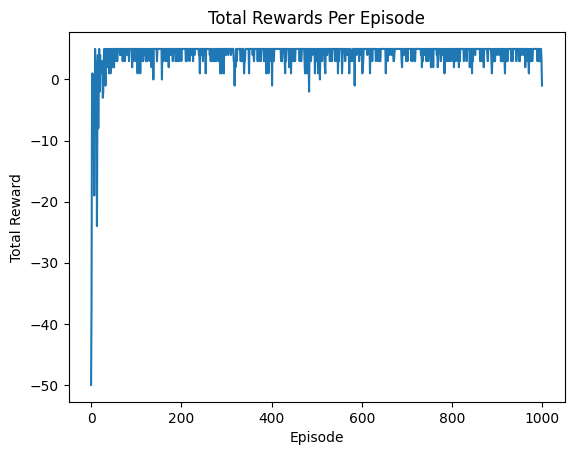

State (0, 0): [0.17524926 1.30752904 0.4357275  1.8098    ]
State (0, 1): [1.27504472 3.122      0.54040511 0.91079153]
State (0, 2): [-0.77255306  3.87961731 -0.78088217 -0.72072806]
State (0, 3): [-0.4361125   2.03630388 -0.42591777 -0.3940399 ]
State (1, 0): [-0.96079601 -0.81012151 -0.53763987  3.0851805 ]
State (1, 1): [1.69531343 4.58       1.18444924 3.7832405 ]
State (1, 2): [0.22737231 1.42715654 0.22687725 6.16992053]
State (1, 3): [-0.24364101  7.9948657   0.84173178  0.44026922]
State (2, 0): [-0.92246599 -0.75488127 -0.77255306  4.31784287]
State (2, 1): [2.84711543 5.19431718 2.14685108 6.2       ]
State (2, 2): [3.75327477 8.         4.00108446 7.48866943]
State (2, 3): [0.87867449 9.99991665 0.77570454 2.31071683]
State (3, 0): [-0.41771855 -0.3940399  -0.3940399   0.05865828]
State (3, 1): [ 0.190691    0.41087407 -0.3126395   7.94954902]
State (3, 2): [ 5.57698325  7.57318986  5.08611499 10.        ]
State (3, 3): [0. 0. 0. 0.]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
class Gridworld:
    def __init__(self, size=4):
        self.size = size
        self.state = (0, 0)  # Start position
        self.goal = (size - 1, size - 1)
        self.actions = ['up', 'down', 'left', 'right']
        self.action_space = len(self.actions)

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 'up':
            x = max(x - 1, 0)
        elif action == 'down':
            x = min(x + 1, self.size - 1)
        elif action == 'left':
            y = max(y - 1, 0)
        elif action == 'right':
            y = min(y + 1, self.size - 1)
        self.state = (x, y)

        if self.state == self.goal:
            return self.state, 10, True  # Goal reached, reward = 10
        else:
            return self.state, -1, False  # Penalty for every step

# Q-Learning Algorithm
def q_learning(env, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((env.size, env.size, env.action_space))
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action_idx = np.random.choice(env.action_space)  # Exploration
            else:
                action_idx = np.argmax(Q[state[0], state[1]])  # Exploitation

            action = env.actions[action_idx]
            next_state, reward, done = env.step(action)
            total_reward += reward

            # Update Q-value
            current_q = Q[state[0], state[1], action_idx]
            max_future_q = np.max(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], action_idx] = current_q + alpha * (reward + gamma * max_future_q - current_q)

            state = next_state

        rewards.append(total_reward)

    return Q, rewards

# Initialize the environment
env = Gridworld(size=4)

# Train the agent
Q, rewards = q_learning(env, episodes=1000)

# Visualize the total rewards per episode
plt.plot(rewards)
plt.title("Total Rewards Per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

# Display the learned Q-values
for i in range(env.size):
    for j in range(env.size):
        print(f"State ({i}, {j}): {Q[i, j]}")
